02_pca_analysis

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler




In [29]:
%store -r df

In [30]:
df.keys()

Index(['age', 'sex', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang',
       'oldpeak', 'ca', 'target', 'cp_1', 'cp_2', 'cp_3', 'thal_1', 'thal_2',
       'thal_3', 'slope_1', 'slope_2'],
      dtype='object')

In [31]:
df.shape

(303, 19)

In [32]:
from sklearn.decomposition import PCA
x = df.drop("target", axis=1)
y = df["target"]
pca=PCA()
X_pca=pca.fit_transform(x)
X_pca.shape

(303, 18)

In [33]:
explained_var = pca.explained_variance_ratio_
cumulative_var = np.cumsum(explained_var)

# Print how many components retain 95% of variance
for i, total in enumerate(cumulative_var):
    print(f"{i+1} components retain {total:.2%} variance")


1 components retain 26.83% variance
2 components retain 40.82% variance
3 components retain 51.69% variance
4 components retain 62.18% variance
5 components retain 71.70% variance
6 components retain 77.69% variance
7 components retain 82.40% variance
8 components retain 86.04% variance
9 components retain 89.24% variance
10 components retain 91.97% variance
11 components retain 93.93% variance
12 components retain 95.72% variance
13 components retain 97.13% variance
14 components retain 98.25% variance
15 components retain 99.15% variance
16 components retain 99.68% variance
17 components retain 99.97% variance
18 components retain 100.00% variance


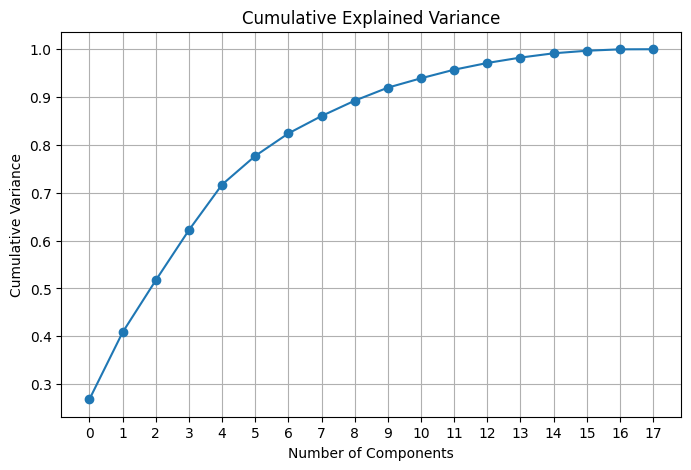

In [34]:
from matplotlib.ticker import MultipleLocator
plt.figure(figsize=(8, 5))
plt.plot(cumulative_var, marker='o')
plt.title("Cumulative Explained Variance")
plt.xlabel("Number of Components")
plt.gca().xaxis.set_major_locator(MultipleLocator(1))
plt.ylabel("Cumulative Variance")
plt.grid(True)
plt.show()

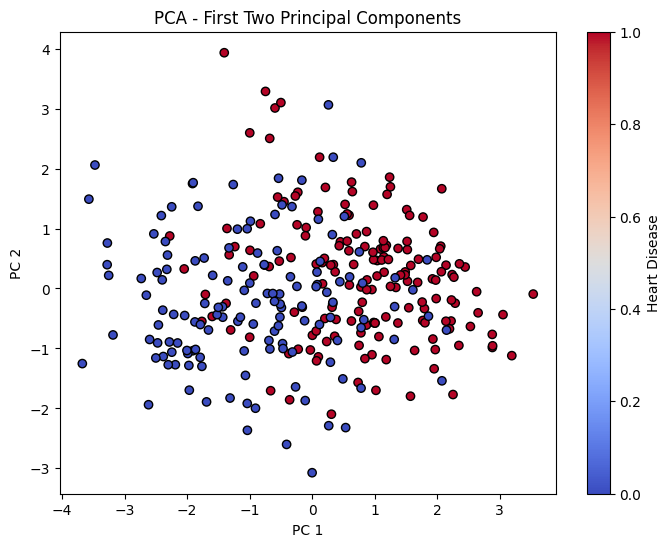

In [35]:
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['target'], cmap='coolwarm', edgecolor='k')
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.title("PCA - First Two Principal Components")
plt.colorbar(label='Heart Disease')
plt.show()


In [36]:
# Find number of components for 95% variance
n_components = np.argmax(cumulative_var >= 0.95) + 1
print(f"Use {n_components} components to retain 95% variance.")



Use 12 components to retain 95% variance.


In [37]:
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(x)
X_pca.shape


(303, 12)

In [40]:
pca_cols = [f"PC{i+1}" for i in range(n_components)]
df_pca = pd.DataFrame(X_pca, columns=pca_cols)
df_pca['target'] = df['target']

In [41]:
%store df_pca

Stored 'df_pca' (DataFrame)
